Import the libraries

In [87]:
import scipy.io as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the data

In [88]:
data = s.loadmat("data.mat")
a = np.array(data['X'])
X=a[:,0]
y=a[:,1]


Plot the data

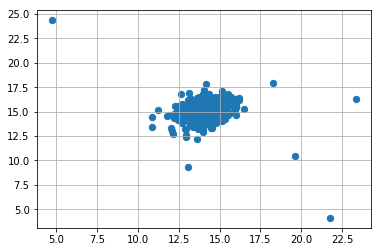

In [90]:
plt.scatter(X,y, s=40)
plt.grid(True)
plt.show()

In [81]:
X = data["X"]
Xval = data["Xval"]
yval = data["yval"]

Find outliers and color them in red. You need to choose your own epsilon

In [82]:
mu = sum(a)*1.0/len(a)
def sigma(dataset):
    total_sum = 0
    for i in range (len(dataset)):
        mu = sum(a)/len(dataset)
        total_sum +=(a[i]-mu)**2
    sqrtroot = total_sum * 1.0 /len(dataset)
    return math.sqrt(sqrtroot)
sigma = sigma(a)
mu = np.mean(a, axis=0)
sigma = np.cov(a.T)

In [85]:
from sklearn.metrics import f1_score

In [111]:
def P(dataset,mu,sigma):
    N = len(dataset)
    G = 1/(((2 * np.pi)**(N/2)) * np.linalg.norm(sigma)**0.5)
    G *=np.exp(-(0.5 * (dataset - mu).T.dot(np.linalg.inv(sigma)).dot((dataset-mu))))
    return G 

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon


In [105]:
p = P(np.array(X),mu,sigma)
p_cv = P(np.array(Xval),mu,sigma)

fscore, ep = selectThresholdByCV(p_cv,np.array(yval))
outliers = np.asarray(np.where(p < ep))


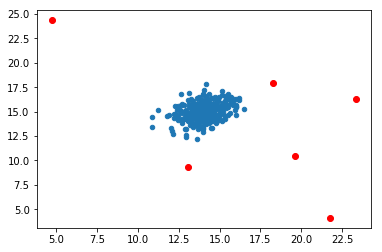

In [91]:
plt.figure() 
plt.scatter(a[:,0],a[:,1],s=20) 
plt.plot(a[outliers,0],a[outliers,1],"ro") 
plt.show()